## Import Statements

In [76]:
# Data structures libraries
import numpy as np 
import pandas as pds

# Graphing libraries
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx

# Data science libraries
from sklearn.covariance import EmpiricalCovariance

## 1.) Load the data from Voteview [1]

In [77]:
# This represents where all the data is stored.

folder = 'voteview_data/'

# Although this has other data within, our use is primarily
# for the ICPSRs (Congressperson identification number) and cast code,
# which is an integer from 0 to 9 serializing how someone voted for a particular bill.

votes = pds.read_csv(folder + 'HSall_votes.csv')

# Similar to the other data, this has a bunch of numerics.  However, we use it to form
# party vectors and to save Congresspeople by name.

parties = pds.read_csv(folder + 'HSall.csv')

# You only have to run this block once, unless you override variables.

In [78]:
votes.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,1,House,1,154,6,61.1
1,1,House,1,259,9,99.6
2,1,House,1,379,1,100.0
3,1,House,1,649,1,59.2
4,1,House,1,786,1,97.7


In [79]:
parties.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,4766,1,98,CT,5000,0.0,1.0,"HUNTINGTON, Benjamin",...,1800.0,0.639,0.304,-29.04670,0.708,84.0,12.0,NaN,0.649,0.229
2,1,House,8457,1,98,CT,5000,0.0,1.0,"SHERMAN, Roger",...,1793.0,0.589,0.307,-40.59580,0.684,107.0,18.0,NaN,0.614,0.298
3,1,House,9062,1,98,CT,5000,0.0,1.0,"STURGES, Jonathan",...,1819.0,0.531,0.448,-25.87361,0.724,80.0,13.0,NaN,0.573,0.529
4,1,House,9489,1,98,CT,5000,0.0,1.0,"TRUMBULL, Jonathan, Jr.",...,1809.0,0.692,0.246,-30.47113,0.750,106.0,11.0,NaN,0.749,0.166


## 2.) Reduce down to a particular Chamber and Congress

In [80]:
def retrieve_session(congress, chamber):
    
    # var congress is the session you want to retrieve (113, 114, 115, etc.)
    # var chamber is either Senate, House, or President.
    
    # We declare these globally, so the dataframes do not have to be passed
    # as a parameter to the function.
    global votes, parties
    
    # This searches the dataframe where the column with key 'congress' matches 
    # the input var congress AND where the column with key 'chamber' matches
    # the input var chamber.  This is to bring the dataframe down to a much smaller size,
    # such that it's easier to operate on.
    reduced_votes = votes.loc[(votes['congress'] == congress) & (votes['chamber'] == chamber)]
    reduced_parties = parties.loc[(parties['congress'] == congress) & (parties['chamber'] == chamber)]
    
    return reduced_votes, reduced_parties

In [81]:
chamber = 'Senate'
congress = 115

In [82]:
reduced_votes, reduced_party = retrieve_session(congress, chamber)

In [83]:
reduced_votes.head()

,congress,chamber,rollnumber,icpsr,cast_code,prob
24336415,115,Senate,1,14009,1,96.4
24336416,115,Senate,1,14226,1,97.1
24336417,115,Senate,1,14307,6,99.9
24336418,115,Senate,1,14435,6,100.0
24336419,115,Senate,1,14503,1,98.6


In [84]:
reduced_party.head()

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
48713,115,Senate,41704,41,0,AL,200,NaN,NaN,"STRANGE, Luther Johnson, III",...,NaN,0.560,0.180,-10.12332,0.95801,236.0,4.0,NaN,0.570,0.225
48714,115,Senate,41705,41,0,AL,100,NaN,NaN,"JONES, Gordon Douglas (Doug)",...,NaN,-0.111,0.115,-34.85139,0.85163,217.0,11.0,NaN,-0.113,0.108
48715,115,Senate,49700,41,0,AL,200,NaN,NaN,"SESSIONS, Jefferson Beauregard III (Jeff)",...,NaN,0.549,0.130,-0.56654,0.97062,19.0,0.0,NaN,0.357,0.241
48716,115,Senate,94659,41,0,AL,200,NaN,NaN,"SHELBY, Richard C.",...,NaN,0.431,0.537,-25.73388,0.95163,519.0,11.0,NaN,0.394,0.490
48717,115,Senate,40300,81,0,AK,200,NaN,NaN,"MURKOWSKI, Lisa",...,NaN,0.208,-0.288,-62.17325,0.88438,506.0,22.0,NaN,0.229,-0.259


## 3.) Retrieve the party vectors from the data

In [85]:
def vectors(congress, chamber):
    
    global votes, parties
    
    reduced_votes, reduced_parties = retrieve_session(congress, chamber)
    
    # This returns all the party codes listed in a column.
    chamber_parties = np.array(reduced_parties['party_code'])
    
    # We then take the unique party code from within that column.
    unique_parties = np.unique(chamber_parties)
    
    # This gives us the unique congresspeople within the dataframe.
    congresspeople = np.unique(reduced_parties['icpsr'])
    
    # Declaring the dictionaries empty so we can more easily override them later.
    pvectors = {party: [] for party in unique_parties}
    icpsrs = {party: [] for party in unique_parties}
    names = {party: [] for party in unique_parties}
    
    # We iterate over the keys so we can reassign each key.
    for party in unique_parties:
        
        # This is just reducing the dataframe down to a specific party.
        current = reduced_parties.loc[(reduced_parties['party_code'] == party)]
        
        # The first gives us a binary representation of a congressperson's presence within
        # a party.  The second gives us the icpsr for identification purposes.

        pvectors[party] = np.array(reduced_parties['party_code'].sort_values() == party).astype(int)
        icpsrs[party] = np.unique(current['icpsr'])
        names[party] = np.unique(current['bioname'])
        
    return pvectors, icpsrs, names

In [86]:
congress = 115; chamber = 'Senate'

party_vectors, icpsrs, names = vectors(congress, chamber)
reduced_votes, reduced_party = retrieve_session(congress, chamber)

To understand party codes, Voteview provides a breakdown [2].

## 4a.) Nokken-Poole Visualization

Now, there are several different ways to interpret this data.  The first, comes from the Nokken-Poole measurement:

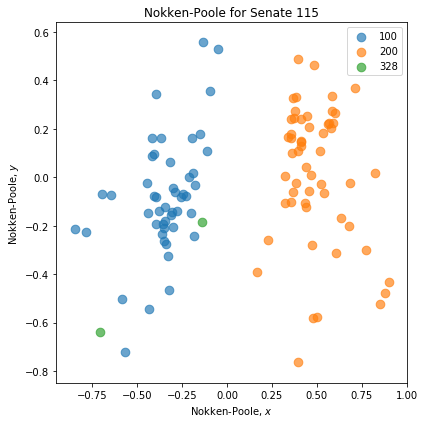

In [87]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))

for party in party_vectors.keys():
    current_party = reduced_party.loc[(reduced_party['party_code'] == party)]
    x = current_party['nokken_poole_dim1']; y = current_party['nokken_poole_dim2']
    ax.scatter(x, y, alpha = 2/3, s = 75)
ax.set_xlabel('Nokken-Poole, $x$'); ax.set_ylabel('Nokken-Poole, $y$')

ax.legend(party_vectors.keys())
ax.set_title('Nokken-Poole for ' + chamber + ' ' + str(congress))
fig.tight_layout()

This is fine, but it is not a network visualization.  If we make the assumption

$A_{ij} \propto \frac{1}{s_{ij}}$

where $A_{ij}$ is a non-diagonal entry in some adjacency matrix and $s_{ij}$ is the distance between two nodes (Congresspeople), then we can formalize the network that way.

In [88]:
def nokken_poole_A(congress, chamber, limit = 1e5):
    
    global votes, parties
    
    _, reduced_party = retrieve_session(congress, chamber)
    
    # So the network is structured such that party affiliation is obvious,
    # if an SBM were to form.
    sorted_reduced_party = reduced_party.sort_values('party_code')
    
    # These must be numpy arrays to be indexed with integers.
    x = np.array(sorted_reduced_party['nokken_poole_dim1'])
    y = np.array(sorted_reduced_party['nokken_poole_dim2'])
    
    # This represents the total number of Congresspeople in this selection.
    N = x.shape[0]
    
    # Declaring the matrix early for computation purposes.
    A = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            
            # For convention, we define A_{ij} = 0 if i = j.
            if i == j:
                A[i, j] = 0
            else:
                # Determining the distance between two nodes.
                D = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
                if D == 0: A[i, j] = limit
                else: A[i, j] = 1/D
                
    return A

In [89]:
A = nokken_poole_A(congress, chamber)

In [90]:
# You can also normalize if you want 0 <= A_ij <= 1.
normalized_A = (A - np.min(A))/(np.max(A) - np.min(A))

Text(0.5, 0, 'congressperson id, $x$')

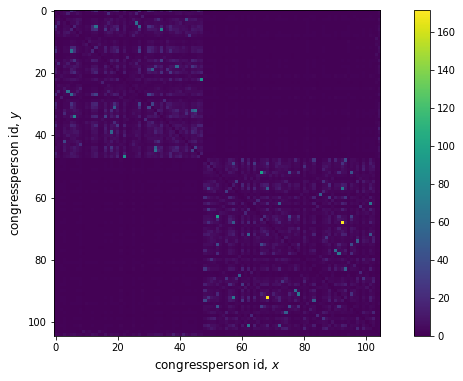

In [91]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

data = ax.imshow(A)
fig.colorbar(data)

ax.set_ylabel('congressperson id, $y$', fontsize = 12)
ax.set_xlabel('congressperson id, $x$', fontsize = 12)

The issue with this model is that it assigns an edge between every Congressperson, when this isn't always the case.  One way to avoid this is to threshold the adjacency matrix.  Note that this only works best for a normalized matrix, as you don't need to know an upper and lower bound.

In [92]:
def thresholding(A, cutoff):
    return (A > cutoff) * A

Text(0.5, 0, 'congressperson id, $x$')

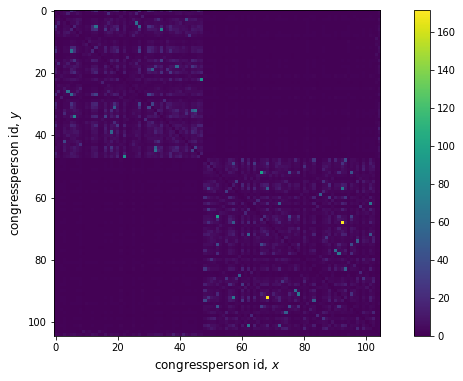

In [93]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

cutoff = np.mean(A)
thresholded_A = thresholding(A, cutoff)

data = ax.imshow(A)
fig.colorbar(data)

ax.set_ylabel('congressperson id, $y$', fontsize = 12)
ax.set_xlabel('congressperson id, $x$', fontsize = 12)

The reason why the threshold is so low is because of two Senators being extremely similar such that $A_{ij}$ is much larger than the rest of the entries.  You can opt to remove it by figuring out to which entry that belongs and deleting it, if you want to look at the average case.

## 4b.) NetworkX Visualization

You can also visualize the matrix in NetworkX for a more aesthetically pleasing diagram.

In [94]:
# First, you declare the graph as a callable function.
G = nx.Graph()

# Then, you assign all of the edges.
edges = np.argwhere(np.triu(A) != 0)

# Then, retrieve all the weights.  Not necessary if a binary system.  NumPy only works by
# passing in a tuple, when edges are not in the form of a tuple.

def weights_from_edges(A, edges):
    E = edges.shape[0] # The number of edges
    W = np.zeros((E)) # The weights associated with the edge.
    for index in range(edges.shape[0]):
        i, j = (edges[index])
        W[index] = A[i, j]
    return W

weights = weights_from_edges(A, edges)

# Then, construct a 3 x E array of edge position and its weight.
edges_and_weights = np.vstack((edges.T, weights)).T

# And finally, adding said edges.
G.add_weighted_edges_from(edges_and_weights)

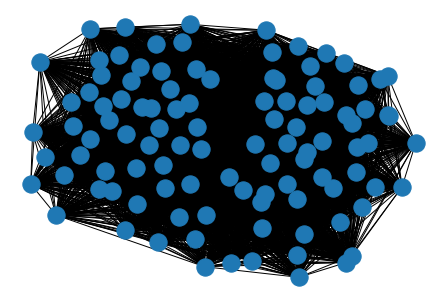

In [95]:
# Now, we can draw it.
nx.draw(G)

This is fine and dandy, but it doesn't tell us who is who.  We can modify it to reflect political parties.

In [96]:
congress = 115; chamber = 'Senate'

party_vectors, icpsrs, names = vectors(congress, chamber)
reduced_votes, reduced_party = retrieve_session(congress, chamber)
A = nokken_poole_A(congress, chamber)

In [97]:
def networkx_graph(A, congress, chamber):

    # First, you declare the graph as a callable function.
    fig, ax = plt.subplots(1, 1)
    G = nx.Graph(ax = ax)
    
    # And get the party vectors.
    party_vectors, _, _ = vectors(congress, chamber)
    
    # Then, you remove any disconnected nodes.
    nonzero = ~np.all(A == 0, axis=0)
    A = A[nonzero,:].copy()
    A = A[:,nonzero].copy()
    
    nodes_to_remove = np.argwhere(nonzero == False)
    nodes_to_remove = [node[0] for node in nodes_to_remove]

    G.remove_nodes_from(nodes_to_remove)
    
    # Then, the associated party vectors.
    for party in party_vectors.keys():
        party_vectors[party] = party_vectors[party][nonzero]


    # Then, you assign all of the edges.
    edges = np.argwhere(np.triu(A) != 0)

    # Then, retrieve all the weights.  Not necessary if a binary system.  NumPy only works by
    # passing in a tuple, when edges are not in the form of a tuple.

    def weights_from_edges(A, edges):
        E = edges.shape[0] # The number of edges
        W = np.zeros((E)) # The weights associated with the edge.
        for index in range(edges.shape[0]):
            i, j = (edges[index])
            W[index] = A[i, j]
        return W

    weights = weights_from_edges(A, edges)

    # Then, construct a 3 x E array of edge position and its weight.
    edges_and_weights = np.vstack((edges.T, weights)).T

    # And finally, adding said edges.
    G.add_weighted_edges_from(edges_and_weights)
    
    # First, declare the position of all objects (nodes and edges).
    position = nx.layout.spring_layout(G)

    # Some background functions:

    def random_color():
        random_number = np.random.randint(0, 16777215)
        hex_number = str(hex(random_number))
        hex_number ='#'+ hex_number[2:]
        return hex_number.upper()

    # We can then streamline the process, so you can automatically change the colors:

    def node_colors(A, party_vectors):
        # This does not override the global variable, as it only exists in this scope.
        parties = {key: tuple(np.random.randint(0,256, 3)/256) for key in party_vectors.keys()}

        # Declare an empty array
        party_array = np.zeros((len(A)))

        for key in party_vectors.keys():
            party_array += key*party_vectors[key]

        colors = []
        for entry in party_array:
            colors += [parties[entry]]

        return colors, parties
    
    # Then draw the edges.

    edge_alpha = 0.075; edge_color = 'grey'
    nx.draw_networkx_edges(G, position, 
                           alpha = edge_alpha, 
                           color = edge_color)

    # Now draw the nodes!

    parties_and_colors = node_colors(A, party_vectors)

    node_alpha = 0.9; node_color = parties_and_colors[0]; node_size = 100

    nx.draw_networkx_nodes(nx.from_numpy_array(A), position, 
                           alpha = node_alpha, 
                           node_color = node_color, 
                           node_size = node_size)

    # We can create a custom legend to show the meaning of the points.

    custom_legend = [Line2D([0], [0],
                            color = 'white',
                            markerfacecolor = parties_and_colors[1][key], 
                            markersize = 10, 
                            marker = "o", 
                            label = key) for key in party_vectors.keys()]

    ax.legend(handles = custom_legend, fontsize = 12)
    ax.axis('off'); # As to remove the bounding box.
    fig.tight_layout();
    return fig, ax

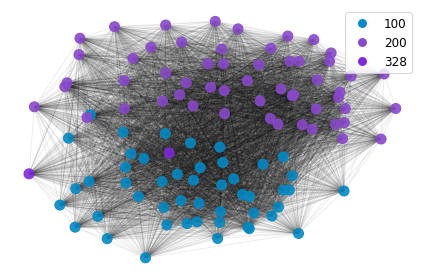

In [98]:
fig, ax = networkx_graph(A, congress, chamber)

You can change this to be the specific political party colors, if you like.  All you need to do is change the entries of the node_color vector to reflect your choices.

Overall, the problem with this method is that it places too much precedence on nearly identical Congresspeople.  Unless you remove them from the system, or convert to binary by an inclusive threshold, then you don't capture a fuller community structure.

## 5.) Covariance Network

You can also treat the voting encoding as several vectors of votes such that the covariance can be taken between each vector.  On the surface, this seems alright, but certainly the most obvious issue is that it treats two adjacent encodings (i.e., 1 and 0) as similar, when they're not [3].  You could hypothetically change the encoding such that the integers are similar, but this leads to a question of objectivity vs subjectivity.  Of course, yea vs. nay is clearly not similar, but deciding that paired yea vs. announced yea is closer to yea is a matter of preference.

We can now get a voting array, which will be used in the next two demonstrations:

In [99]:
def voting_array(congress, chamber): 
    
    global votes, parties
    
    reduced_votes, reduced_parties = retrieve_session(congress, chamber)
    party_vectors, icpsrs, names = vectors(congress, chamber)
    
    # This gives us a list of all votes brought to the particular chamber.
    unique_bills = np.unique(reduced_votes['rollnumber'])
    
    # Find the size of one chamber for a given session
    N = 0; B = len(unique_bills)
    for val in icpsrs.values():
        N += len(val)
    
    # We can form an empty array of all Congresspeople with all unique bills from that session
    X = np.zeros((N,B))
    
    # To keep track of our location, since the dictionary is disjointed.
    index = 0
    
    for key in icpsrs.keys():
        for person in icpsrs[key]:
            
            # Get all of the bills for that particular person.
        
            current_bills = reduced_votes.loc[(reduced_votes['icpsr'] == person)]
            
            # This gives us a location of all of the bills in the array,
            # since some people did not cast the full session.
            current_ids = np.array((current_bills['rollnumber'])) - 1
            
            # Assigning said encodings to the array and incrementing the index by one,
            # for the next Congressperson.
            X[index, current_ids] = current_bills['cast_code']
            index += 1
            
    return X, party_vectors, names

Now, we can calculate the empirical covariance of said voting array, although it must be noted that it must be thresholded by at least zero.  Since this produces our adjacency matrix, we work under the assumptions that there can be no negative edges.

In [100]:
congress = 115; chamber = 'Senate'
X, party_vectors, _ = voting_array(congress, chamber)

In [101]:
def covariance(X, threshold = 0, self_edges = False):
    
    # Generate a covariance matrix in sklearns data structure.
    cov = EmpiricalCovariance().fit(X.T) 
    
    # Convert it to a Python3 list.
    A = cov.covariance_.tolist() 
    
    # Now, we must remove self edges, only if we care about that.
    if self_edges == False:
        A -= np.diag(np.diag(A))
     
    # This returns a weighted adjacency matrix, such that all edge values
    # less than the threshold are set to zero.
    A = thresholding(A, threshold)

    return A

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce09fbe090>)

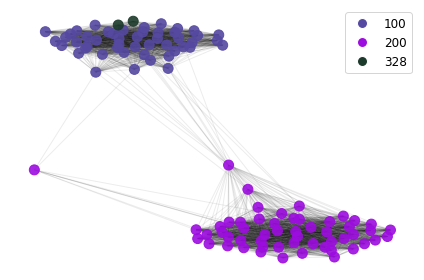

In [102]:
A = covariance(X, threshold = 0.5)
networkx_graph(A, congress, chamber)

## 6.) Probability Network

Finally, we can define a network such that an edge represents the probability that a Congressperson votes the same as another, based on their voting history.  This is derived from a paper by James Moody and Peter J. Mucha [4].  

It is important to note that we remove certain bills where the similarity is greater than a certain margin. In the case of the aforementioned paper, they decided upon 97%.  When comparing the similarity of two Congresspeople, we remove instances where at least one of the people were unable to vote, due to not being in the chamber at the time.

First, we must design a method to calculate similarity, given two bill vectors:

In [103]:
def voting_similarity(congressperson_1, congressperson_2):
    
    # First, we find the locations where the integer encodings are the same:
    same_votes = (congressperson_1 == congressperson_2)
    
    # Then we remove the zero votes:
    nonzero_same_votes = np.argwhere(congressperson_1[same_votes] != 0).shape[0]
    
    # Not to forget how many bills total they've voted on together:
    total_bills = congressperson_1[congressperson_1 * congressperson_2 != 0].shape[0]
    
    # This should never happen, but just in case.
    if total_bills == 0: return 0
    else: return nonzero_same_votes/total_bills

Then, applying this to the voting array, X:

In [104]:
def probability_matrix(X, threshold = 1, self_edges = False):
    
    N, B = X.shape
    
    # We declare an empty array to store the similarities of each bill.
    bill_similarity = np.zeros((B))
    
    # The adjacency matrix
    A = np.zeros((N, N))
    
    # Then we iterate, to find the similarity of each bill.
    for bill in range(B):
        # This gives us a bill for the current iteration.
        specific_bill = X[:,bill]
        
        # We take the unique values for encodings of the particular bill,
        # then we count the frequency of said values.  That is counts_elements.
        _, counts_elements = np.unique(specific_bill, return_counts=True)
        
        # We store the proportion of the most common encoding divided by the total bills such 
        # that they're nonzero.  We can take the maximum because this will give us the highest-case
        # scenario when it comes to Congresspeople voting similarly.
        bill_similarity[bill] = np.max(counts_elements)/np.sum(specific_bill != 0)
        
    # We reduce X down to the bills where the similarity is less than the threshold.
    reduced_X = X[:,bill_similarity < threshold]
    
    # Now, we calculate the probabilities for each entry of A:
    for congressperson_1 in range(N):
        for congressperson_2 in range(N):
            P = voting_similarity(reduced_X[congressperson_1], reduced_X[congressperson_2]) 
            A[congressperson_1, congressperson_2] = P
            
    # We remove self edges if necessary: 
    if self_edges == False:
        A -= np.diag(np.diag(A))
        
    return A

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdfa3a4250>)

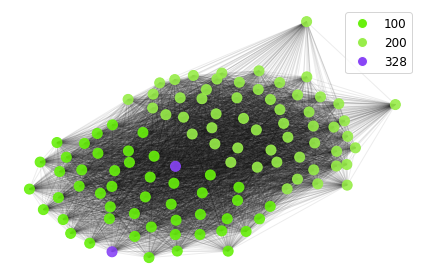

In [105]:
A = probability_matrix(X)
networkx_graph(A, congress, chamber)

You can also convert this into a binary system by thresholding.  One such example is by rounding the array:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdf9e3ebd0>)

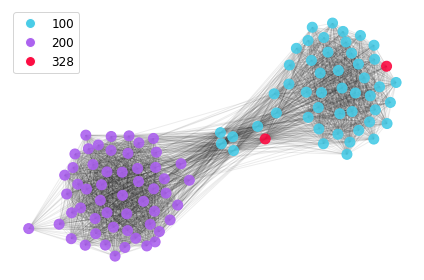

In [106]:
networkx_graph(np.round(A), congress, chamber)

## Conclusion

These are just a few methods in which one can visualize the Voteview dataset.  Of course, they all have their pros and cons, so one's choice should rely on that.  

And also, these are not the only methods to generate an adjacency matrix, just perhaps the most convenient.  Resources can be found cited below:

## Resources
[1] https://voteview.com/data

[2] https://voteview.com/articles/data_help_parties

[3] https://voteview.com/articles/data_help_votes

[4] https://www.researchgate.net/publication/259432396_Portrait_of_Political_Party_Polarization